Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert the dates to a month format (these are US dates, so the format si MM/DD/YYYY).
# 2. Extract the month to a new column

In [2]:
# load csv
pumpkins = pd.read_csv('../data/US-pumpkins.csv')

# filter package to "bushel"
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.sample()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1051,COLUMBIA,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/17,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [4]:
new_colums = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_colums], axis=1)

pumpkins.sample()

,Package,Date,Low Price,High Price
1739,1/2 bushel cartons,9/30/16,13.75,15.0


# Determine average price of pumpkin

In [5]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

In [6]:
new_pumpkins = pd.DataFrame({'Month': month,
                             'Package':pumpkins['Package'],
                             'Low Price':pumpkins['Low Price'],
                             'High Price':pumpkins['High Price'],
                             'Price':price})

new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


## normalize pricing (to price per bushel)

In [7]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price / (1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price / (1/2)

new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


# Visualize Data

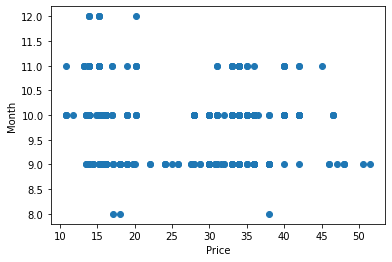

In [9]:
price = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price, month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.show()

Text(0, 0.5, 'Pumkin Price')

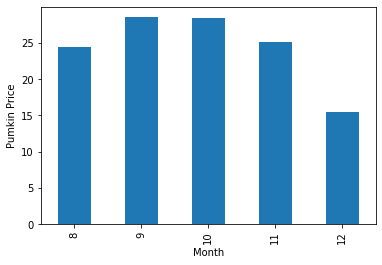

In [11]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumkin Price')